<a href="https://colab.research.google.com/github/badek23/forest-fire-detection/blob/main/YOLOv8_app_deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Training

In [1]:
# Check that we are on GPU
!nvidia-smi

Thu Jul  4 22:05:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Create Home variable
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Install the ultralytics package from GitHub
!pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-acieglba
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-acieglba
  Resolved https://github.com/ultralytics/ultralytics.git to commit d5db9c916ff8831ec6bb11944cc24d7bbc74a2b6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)


In [5]:
# Pip install supervision and roboflow
!pip install -q supervision roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00


In [7]:
# Import YOLOv10 from ultralytics
from ultralytics import YOLO

In [8]:
# Create and navigate to datasets directory
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install -q roboflow

/content/datasets


In [9]:
# Import libraries
from google.colab import userdata
from roboflow import Roboflow

# Create connection to Roboflow workspace
rf = Roboflow(api_key="ULUfcs475oo0dWNDRqDv")

#project = rf.workspace("vishal-sharma-hfh1k").project("fire-smoke-detection-1oemc")
#version = project.version(3)

#project = rf.workspace("ly-project").project("forest-fire-detection-ilo2d")
#version = project.version(1)

project = rf.workspace("mccaai-ohxca").project("fire-u163g")
version = project.version(2)


dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.49, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to fire-2 in yolov8:: 100%|██████████| 3454/3454 [00:00<00:00, 5818.66it/s]


In [10]:
 # Put data into correct format for training
 !sed -i '$d' {dataset.location}/data.yaml
 !sed -i '$d' {dataset.location}/data.yaml
 !sed -i '$d' {dataset.location}/data.yaml
 !sed -i '$d' {dataset.location}/data.yaml
 !echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [11]:
# Train model

# I decided to upgrade to the YOLOv10s (small) version of YOLOv10. Additionally, I decreased batch size to 16 and increased epochs to 100.
%cd {HOME}

!yolo task=detect mode=train epochs=100 batch=16 lr0=0.01 plots=True \
model=/content/weights/yolov8s.pt \
data={dataset.location}/data.yaml

/content
100% 21.5M/21.5M [00:00<00:00, 344MB/s]
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov8s.pt, data=/content/datasets/fire-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

/content


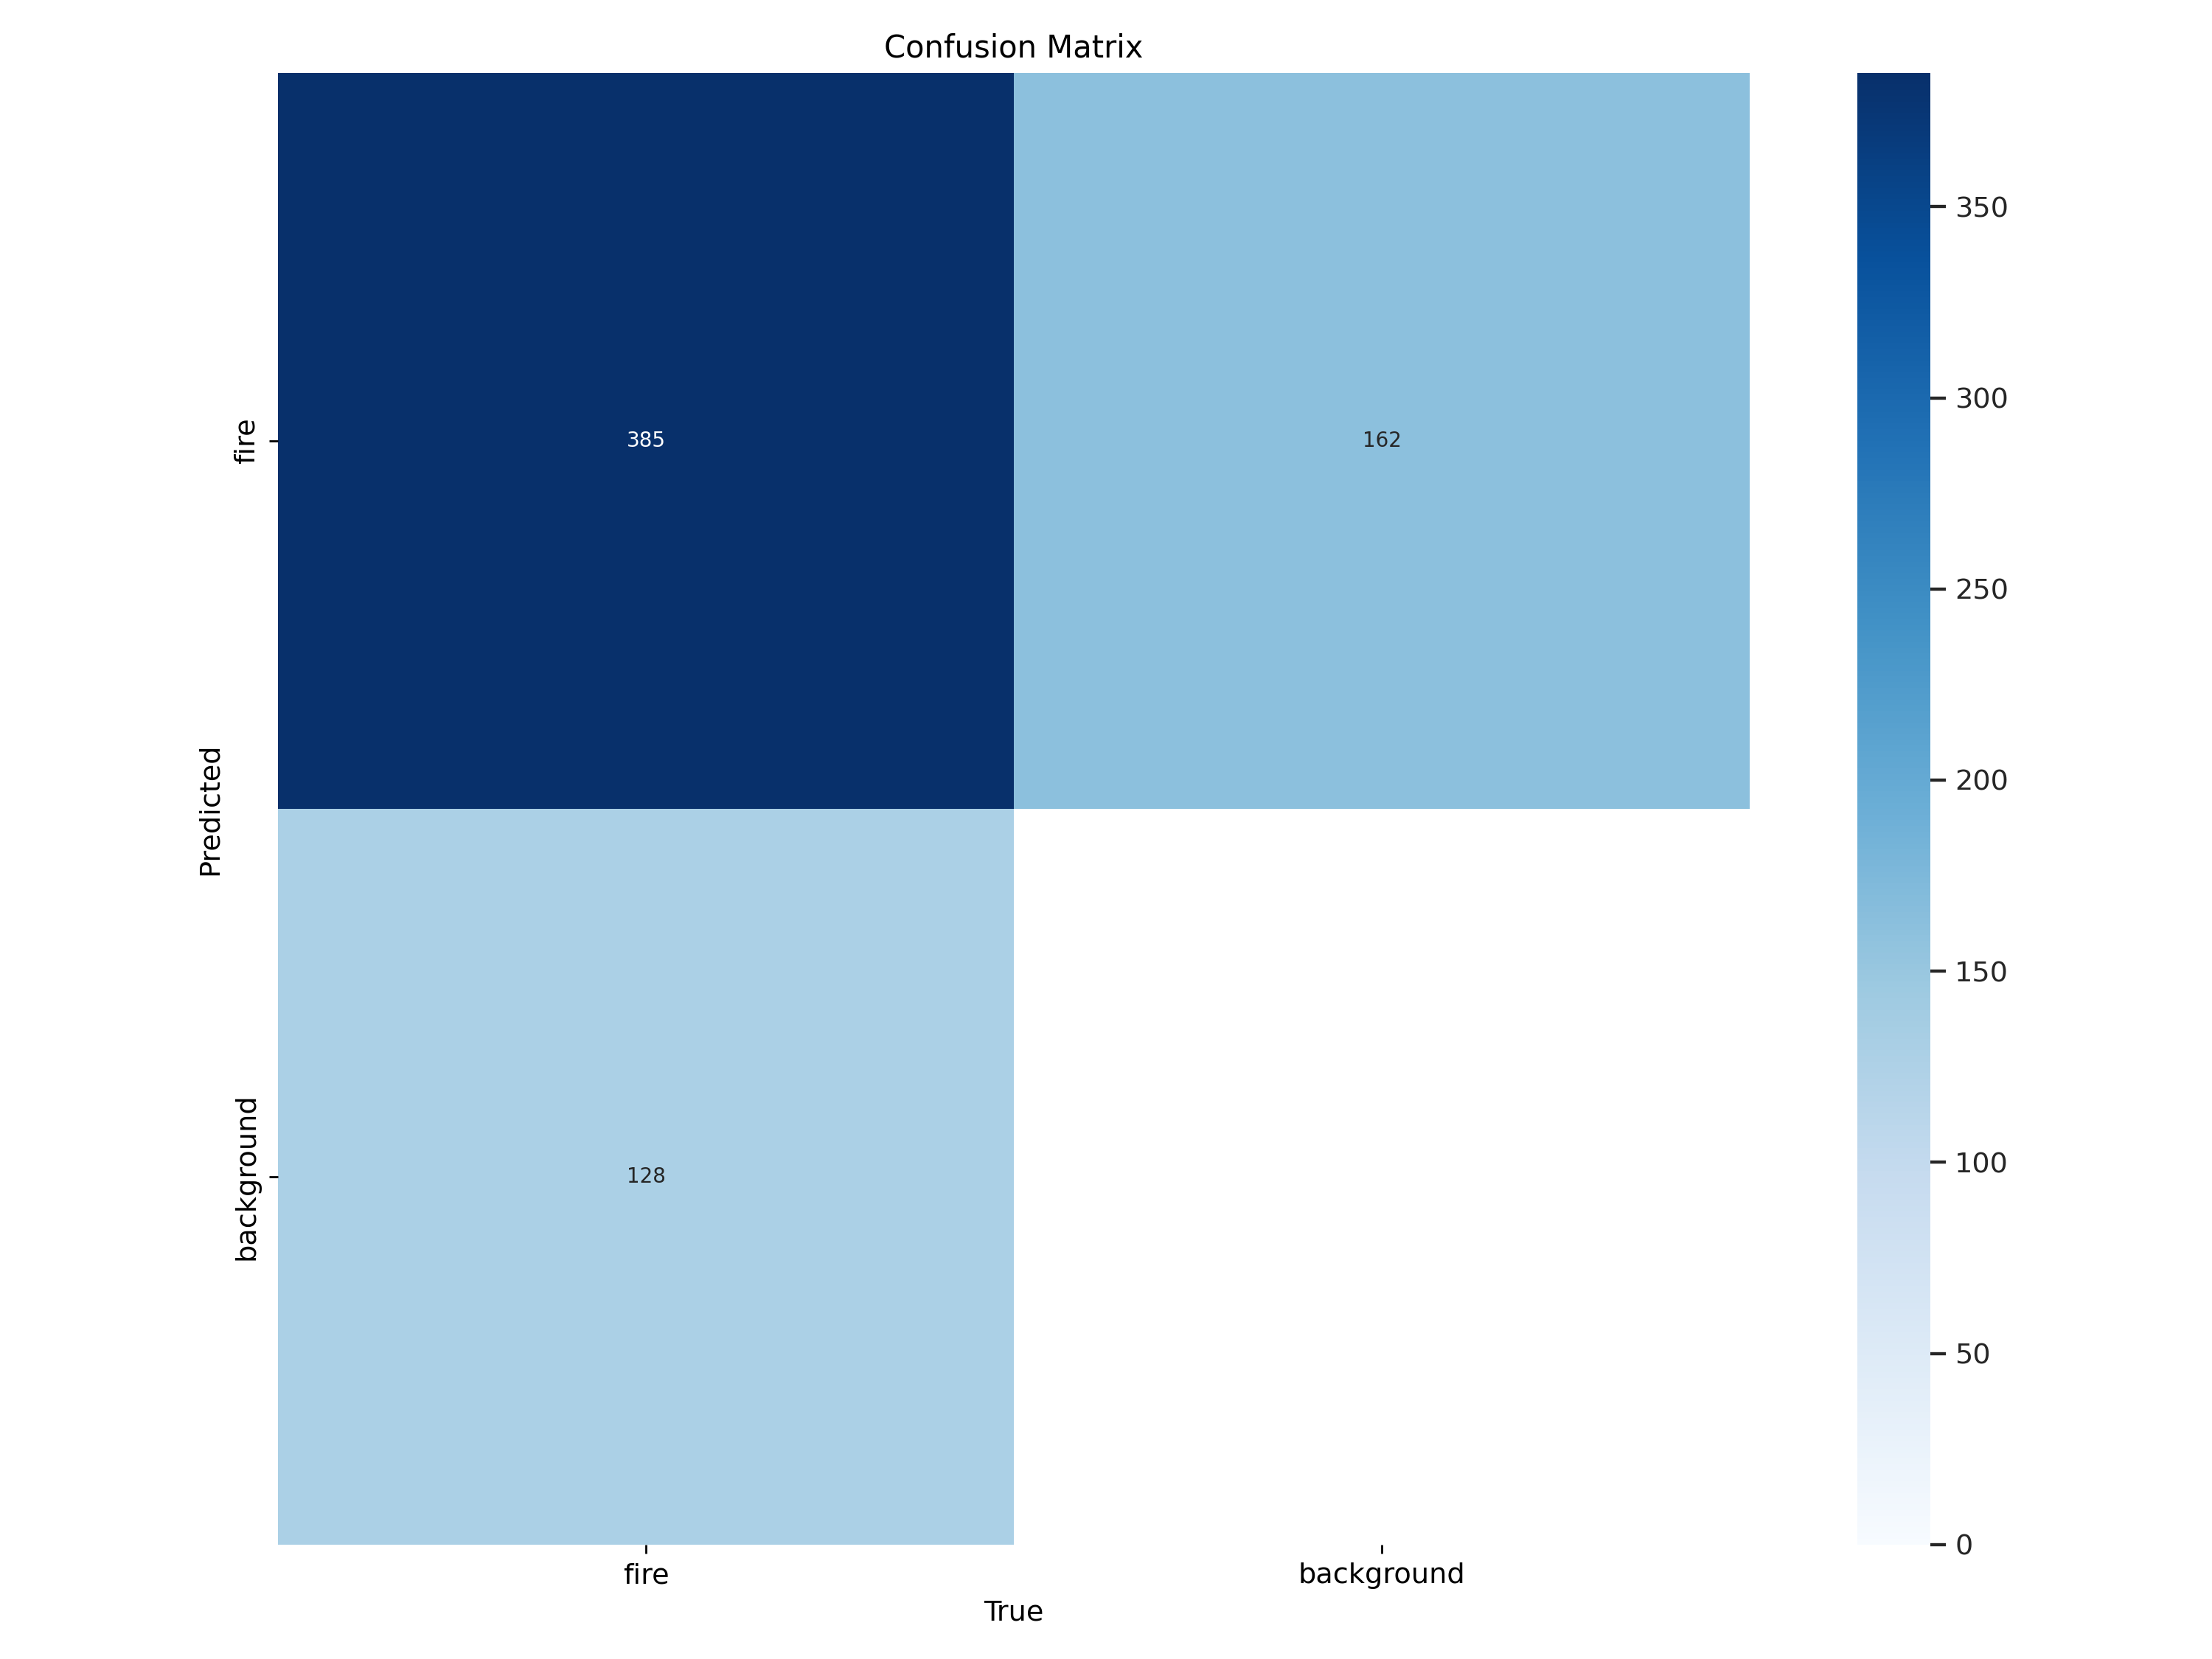

In [12]:
# Take a look at the confusion matrix of training results
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


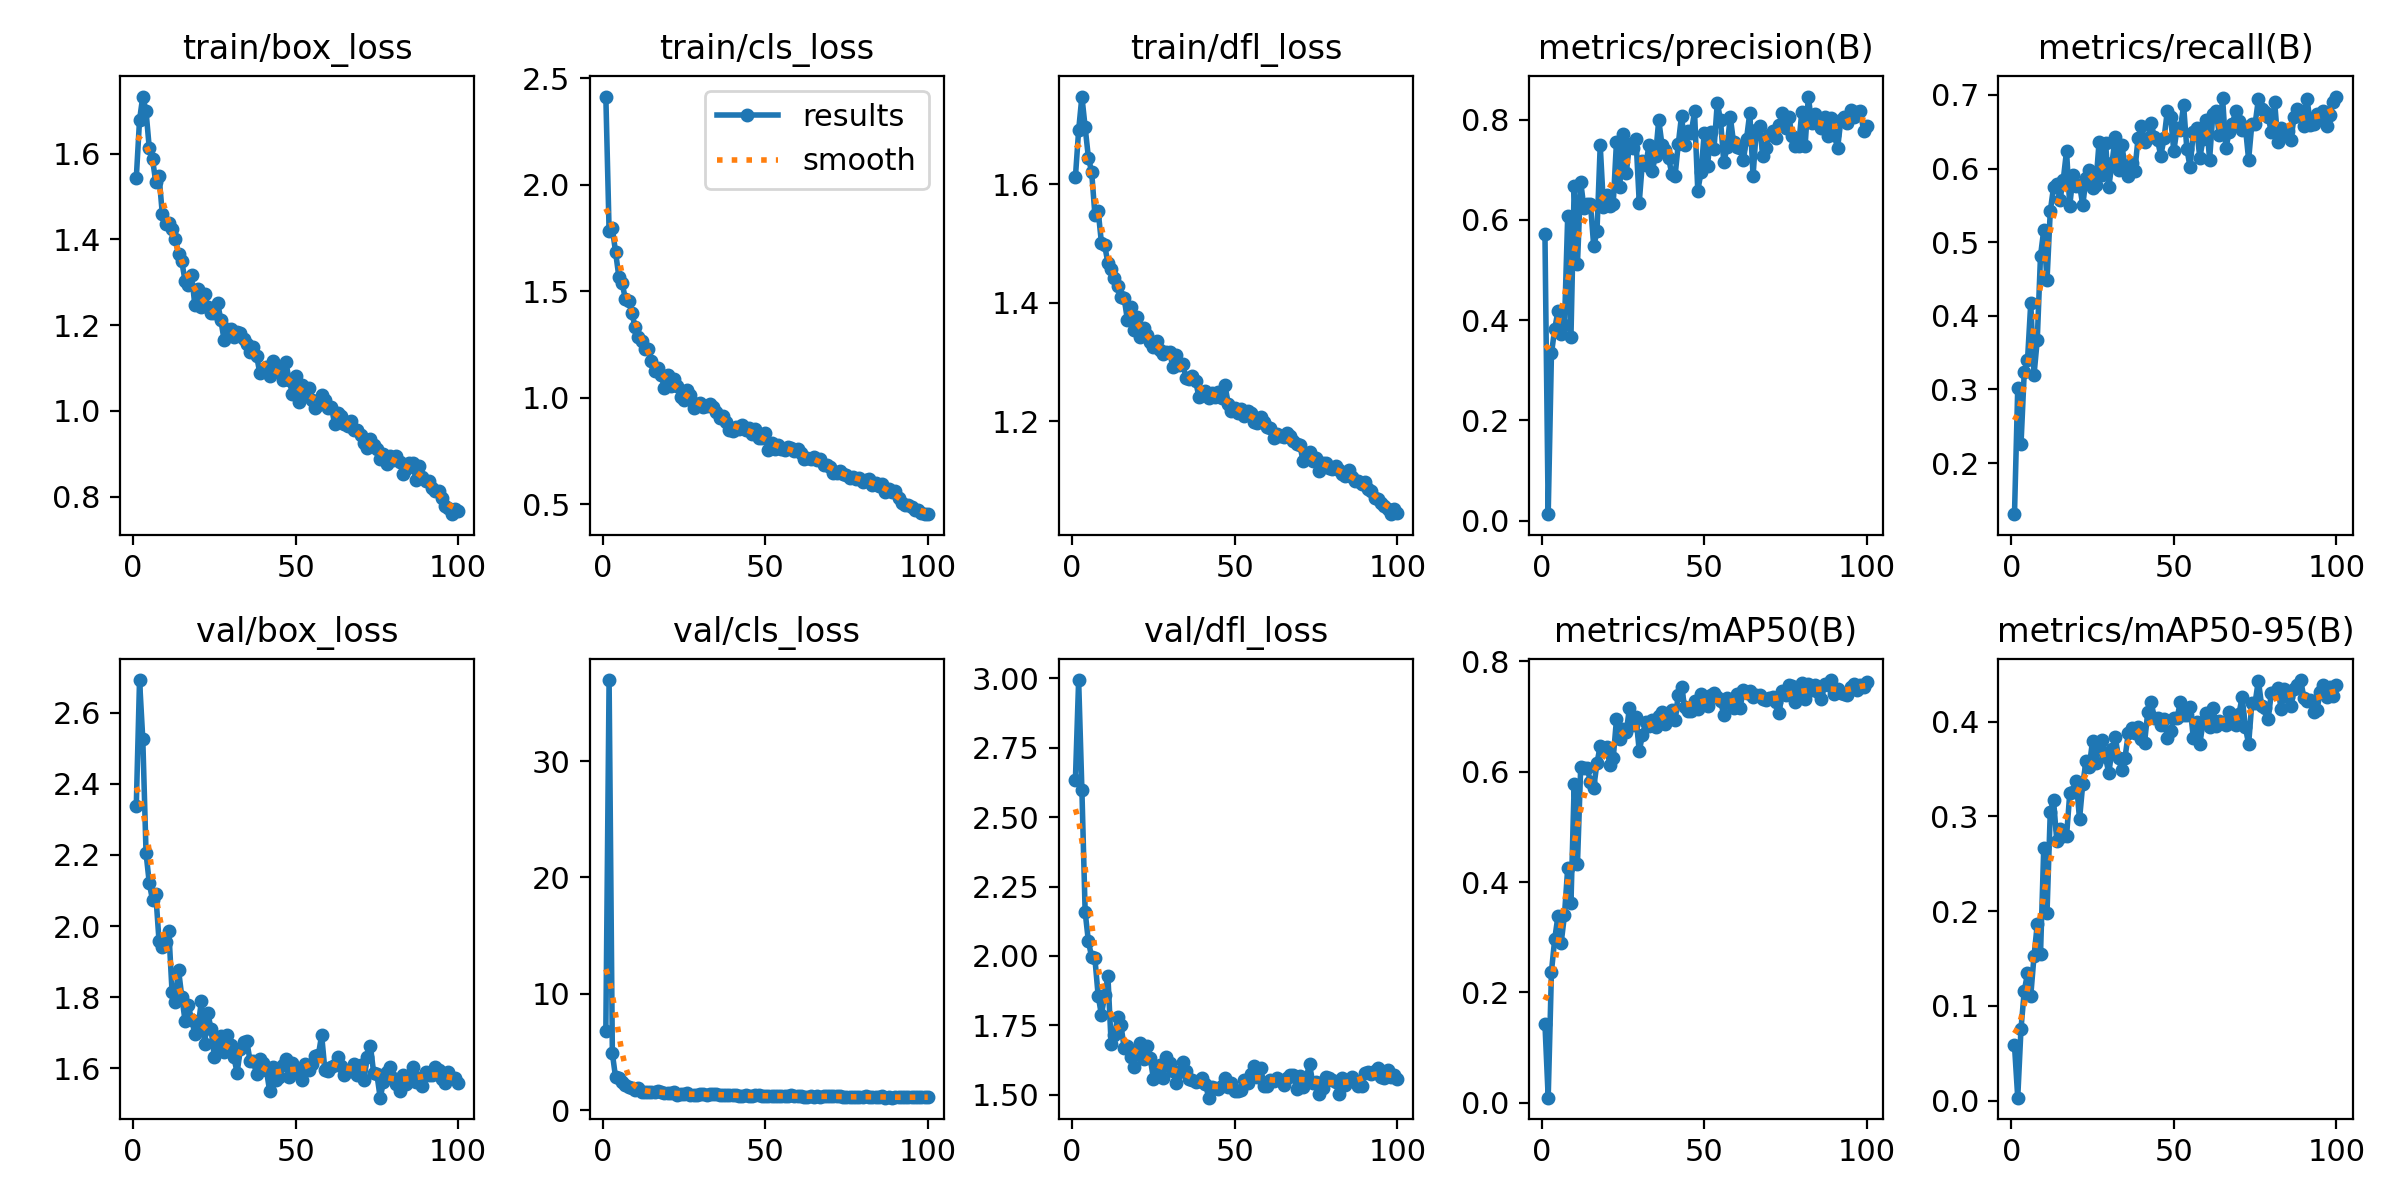

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [16]:
# Load newly trained model

import supervision as sv
from ultralytics import YOLO

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    #images_directory_path=f"{dataset.location}/valid/images",
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()


0: 640x640 2 fires, 421.0ms
Speed: 3.9ms preprocess, 421.0ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 640)


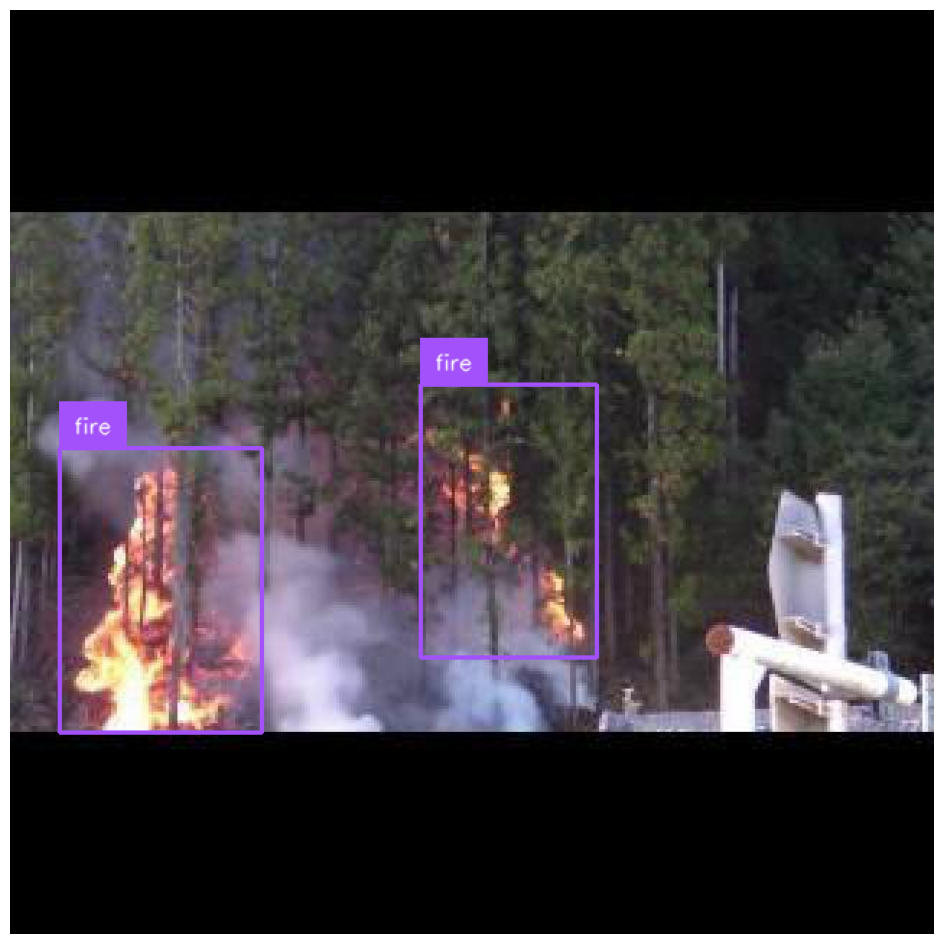

In [19]:
# Randomly select image from validation set and visualize the results

import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [17]:
import supervision as sv
from ultralytics import YOLO

# Load model
model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 126.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 291.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 333.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 24

100%|██████████| 1.11M/1.11M [00:00<00:00, 58.9MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 50.76file/s]



ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: slimming with onnxslim 0.1.31...
ONNX: export success ✅ 2.3s, saved as '/content/runs/detect/train/weights/best.onnx' (42.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 54.0s, saved as '/content/runs/detect/train/weights/best_saved_model' (106.9 MB)

TensorFlow Lite: starting export with tensorflow 2.15.0...
TensorFlow Lite: export success ✅ 0.0s, saved as '/content/runs/detect/train/weights/best_saved_model/best_float32.tflite' (42.7 MB)

Export complete (56.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/content/datasets/fire-2/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best_saved_model/best_float32.tflite'